# Выбор локации для скважины

Описание проекта: компания «ГлавРосГосНефть» должна выбрать, в каком регионе начать добывать нефть для того, чтобы максимизировать прибыль
    
Цель исследования: используя модель, которая предскажет объём запасов в новых скважинах, нужно выбрать скважины с самыми высокими оценками значений и определить регион с максимальной суммарной прибылью отобранных скважин.
    
Ход исследования:

    Подготовка данных: загрузка и изучение общей информации из предоставленных датасетов
    
    Предобработка данных: обработка пропущенных значений, удаление дубликатов и т.д.
    
    Исследовательский анализ данных: статистический анализ всех признаков
   
    Корреляционный анализ данных: расчет коэффициентов корреляции для всех признаков
    
    Обучение модели: обучение модели линейной регрессии и её проверка на каждом регионе
    
    Расчет прибыли: расчет достаточного объёма сырья для безубыточной разработки новой скважины
    
    Расчет рисков и прибыли для каждого региона: применив технику Bootstrap, найти распределение прибыли, 95% доверительный интервал и риск убытков.
    
Общий вывод: резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций: окончательный выбор региона для разработки скважины
 

## Загрузка и подготовка данных

In [1]:
TEST_SIZE=0.75
RANDOM_STATE=42
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import sys
!"{sys.executable}" -m pip install phik -q
import phik

In [2]:
geo0=pd.read_csv('/datasets/geo_data_0.csv')
display(geo0)
print(geo0.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [3]:
geo1=pd.read_csv('/datasets/geo_data_1.csv')
display(geo1)
geo1.info()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
geo2=pd.read_csv('/datasets/geo_data_2.csv')
display(geo2)
geo2.info()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Теперь проверю данные на корректность

In [5]:
print(geo0.duplicated(subset='id').sum())
print(geo1.duplicated(subset='id').sum())
geo2.duplicated(subset='id').sum()

10
4


4

In [6]:
print(geo0.duplicated(subset=['id','product']).sum())
print(geo1.duplicated(subset=['id','product']).sum())
geo2.duplicated(subset=['id','product']).sum()

0
0


0

Скорее всего, во всех трех регионах были скважины, которые раскапывались более одного раза, поэтому в датасет они попали более, чем единожды.

Проверю данные на наличие выбросов.

## Статистический анализ данных

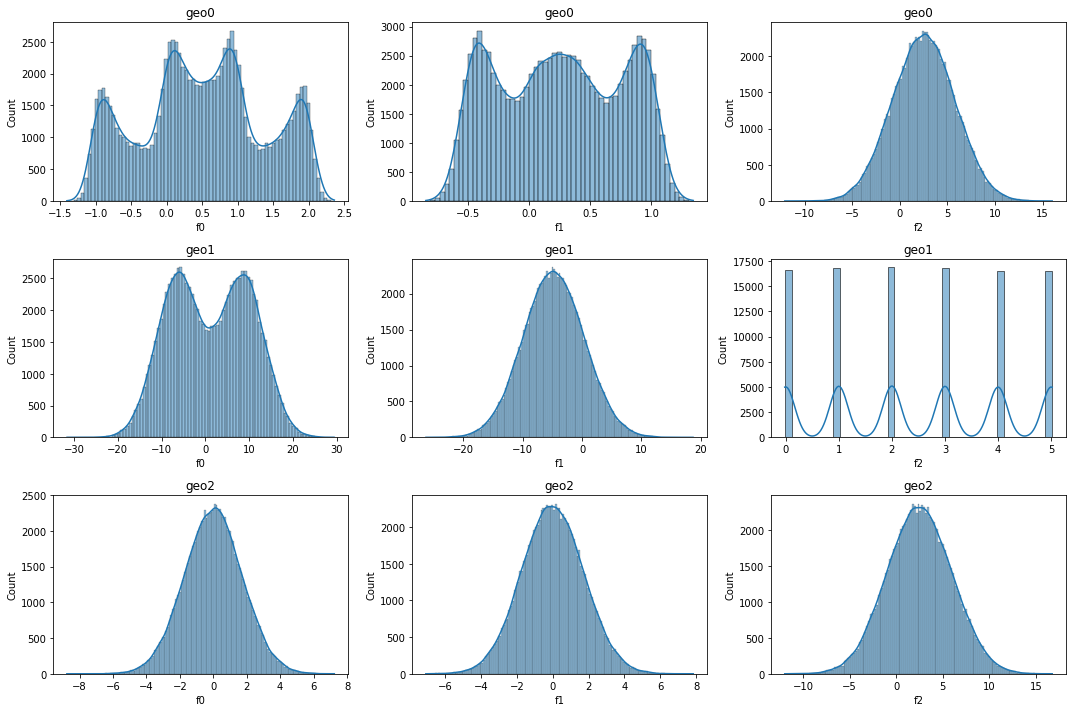

In [7]:
fig, axes=plt.subplots(3,3,figsize=(15,10))
axes = axes.flatten()
j=0
graphs=[geo0,geo1,geo2]
names=['geo0','geo1','geo2']
prizs=['f0','f1','f2']
def graphik(data,x,axes,name):
    sns.histplot(ax=axes,data=data,x=x,kde=True)
    axes.set_title(name)
i=0
for feat in graphs:
    for priz in prizs:
        name='geo'+str(i)
        graphik(feat,priz,axes[j],name)
        j+=1
    i+=1
plt.tight_layout() 
plt.show()

Замечу, что в 1 регионе 1 и 2 признак распределены мультимодально, а 3 нормально со смещением вправо

Во 2 регионе 1 признак распределен бимодально, 2 признак распределен нормально, что касается 3 признака, значения очень близки к целым числам.

В 3 регионе 1 и 2 признак распределены нормально, 3 признак распределен нормально со смещением вправо.

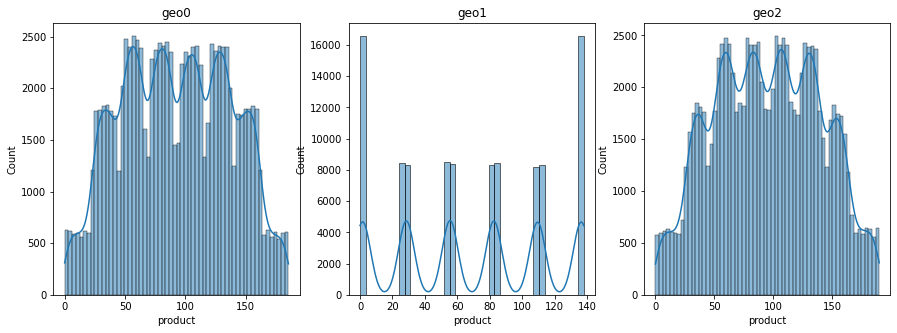

In [8]:
fig, axes=plt.subplots(1,3,figsize=(15,5))
axes = axes.flatten()
i=0
for feat in graphs:
    name='geo'+str(i)
    graphik(feat,'product',axes[i],name)
    i+=1

Что касается распределения целевого признака, в 1 и 3 регионе ситуация похожа: большинство скважин содержат от 25 до 175 тыс. баррелей. Во 2 регионе наблюдается странная ситуация: в большинстве скважин либо находят много нефти, либо не находят ничего.

## Корреляционный анализ данных

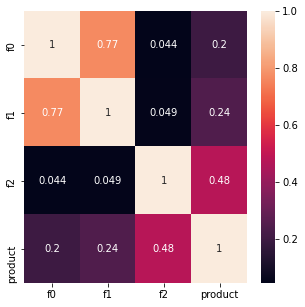

In [9]:
def matr(geo):
    matrix=(geo.sample(frac=0.1,replace=False,random_state=RANDOM_STATE).drop(columns='id').phik_matrix(interval_cols=['f0','f1','f2','product']))
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix,annot=True)
    plt.show()
matr(geo0)

В 1 регионе признаки f1 И f0 достаточно сильно коррелируют между собой, так что можно говорить о мультиколлинеарности.

На целевой признак сильнее всего влияет f2 

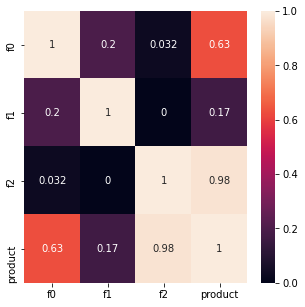

In [10]:
matr(geo1)

На целевой признак сильнее всего влияет f2, видимо в большинстве случаев он и определяет, насколько большими запасами нефти будет обладать скважина 

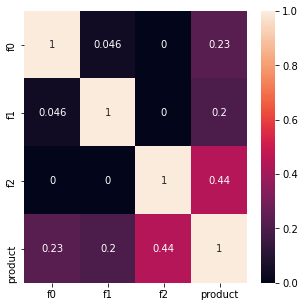

In [11]:
matr(geo2)

На целевой признак заметно влияет f2, мультиколлинеарности не обнаружено

## Обучение и проверка модели

Приступлю к обучению моделей

### 1 регион

In [12]:
def learn(geo):
    scaler=StandardScaler()
    X_train,X_valid,y_train,y_valid=train_test_split(
    geo.drop(columns=['id','product']),
    geo['product'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE)
    X_train=scaler.fit_transform(X_train)
    X_valid=scaler.transform(X_valid)
    model=LinearRegression()
    model.fit(X_train,y_train)
    meow=pd.DataFrame()
    meow['product_true']=y_valid
    y_pred=model.predict(X_valid)
    meow['product_pred']=y_pred
    return meow

In [13]:
meow=learn(geo0)
meow

,product_true,product_pred
75721,122.073350,102.413620
80184,48.738540,78.428581
19864,131.338088,115.685353
76699,88.327757,105.745559
92991,36.959266,98.054345
...,...,...
56045,157.133687,90.156981
12170,19.072741,55.658625
51701,14.092068,65.511171
44541,157.436331,70.140292


In [14]:
y_pred=meow['product_pred']
rmse=(mean_squared_error(meow['product_true'],y_pred)**0.5)
print(rmse)
y_pred.mean()

37.67473814181


92.5469799263037

Замечу, что корень средней квадратичной ошибки достаточно большой, модель в среднем отклоняется более, чем на треть от предсказанного значения.

### 2 регион

In [15]:
meow1=learn(geo1)
meow1

,product_true,product_pred
75721,0.000000,0.837183
80184,53.906522,52.923509
19864,134.766305,135.115772
76699,107.813044,109.494296
92991,0.000000,-0.046416
...,...,...
56045,84.038886,83.593689
12170,137.945408,137.194363
51701,3.179103,2.452826
44541,0.000000,-1.066990


In [16]:
y_pred1=meow1['product_pred']
rmse1=(mean_squared_error(meow1['product_true'],y_pred1)**0.5)
print(rmse1)
y_pred1.mean()

0.8914134052552113


68.78870548209174

Средняя ошибка в значениях у 2 региона значительно ниже. Это значит, что предсказать объемы запасов в этом регионе предсказать проще, чем в первом, признаки сильнее влияют на целевой, из-за чего модель успешно справляется с предсказаниями объемов. Однако среднее предсказанное значение запасов нефти уступает первому, скорее всего из-за того, что во 2 регионе очень много скважин без нефти.

### 3 регион 

In [17]:
meow2=learn(geo2)
meow2

,product_true,product_pred
75721,117.441301,97.518850
80184,47.841249,101.556414
19864,45.883483,54.007357
76699,139.014608,109.967019
92991,84.004276,72.506744
...,...,...
56045,78.167883,65.065135
12170,7.058228,76.794704
51701,49.235687,59.599694
44541,112.772856,111.770079


In [18]:
y_pred2=meow2['product_pred']
rmse2=(mean_squared_error(meow2['product_true'],y_pred2))**0.5
print(rmse2)
y_pred2.mean()

40.069264439586995


94.94337571696384

В 3 регионе ошибка еще больше, чем в первом, однако среднее предсказанное значение является наибольшим среди трех регионов, хотя и отличается несильно.

### Микровывод

Наименее рискованными будут раскопки во 2 регионе, так как в нем модель по имеющимся признакам практически безошибочно может предсказать объемы запасов скважины. Что касается 1 и 3 регионов, в них вероятность ошибки гораздо выше, однако и шанс того, что тыс. баррелей в скважине окажется больше, чем во 2 регионе, гораздо выше

## Подготовка к расчёту прибыли

Создам константы для всех ключевых значений

In [19]:
MONEY=10000000000
COST=450000
N_BEST=200
bootstrap_samples = 1000
state = np.random.RandomState(12345)

Так как всего наш бюджет составляет 10 миллиардов, для разработки будет выбрано 200 скважин, а 1 единица в столбце product составляет 450 тыс. баррелей, то, чтобы расчитать безубыточное количество тыс. баррелей в скважине, необходимо разделить бюджет на кол-во скважин для разработки и на стоимость тыс. баррелей(общая формула: avg* COST *N_BEST=MONEY)

In [20]:
avg=MONEY/COST/N_BEST
print(avg,'тыс.баррелей')

111.11111111111111 тыс.баррелей


In [21]:
print(geo0['product'].mean())
print(geo1['product'].mean())
geo2['product'].mean()

92.50000000000001
68.82500000000002


95.00000000000004

В каждом из 3 регионов среднее значение запасов в скважине меньше чем требуемое, во 2 регионе оно вообще меньше почти в 2 раза.

## Расчёт прибыли и рисков 

Напишу функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.

In [22]:
def revenue(meow):
    meow=meow.sort_values(by='product_pred',ascending=False)
    y_true=meow['product_true'].to_list()
    return sum(y_true[:N_BEST])*COST-MONEY


### Bootstrap 1 регион

In [23]:
values = []
for i in range(bootstrap_samples):
    subsample=meow.sample(n=500,replace=False,random_state=state)
    values.append(revenue(subsample))
avg_rev=round(sum(values)/len(values),2)
values=pd.Series(values)
loss_risk = (values < 0).sum()/len(values)*100
lower = values.quantile(0.025).round(2)
upper = values.quantile(0.975).round(2)
print("Средняя выручка:",avg_rev)
print("Доверительный интервал:",'[',lower,';',upper,']')
print("Риск убытков:",loss_risk,'%')

Средняя выручка: 432169600.81
Доверительный интервал: [ -112795768.84 ; 917901345.27 ]
Риск убытков: 5.3 %


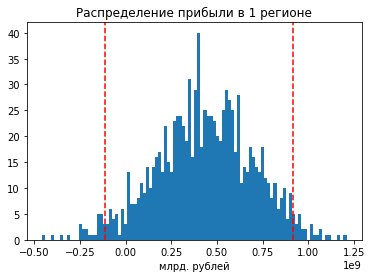

In [24]:
plt.hist(values,bins=100)
plt.axvline(x=lower, color='r', linestyle='--')
plt.axvline(x=upper, color='r', linestyle='--')
plt.title('Распределение прибыли в 1 регионе')
plt.xlabel('млрд. рублей')
plt.show()

### Bootstrap 2 регион

In [25]:
values = []
for i in range(bootstrap_samples):
    subsample=meow1.sample(n=500,replace=False,random_state=state)
    values.append(revenue(subsample))
avg_rev=round(sum(values)/len(values),2)
values=pd.Series(values)
loss_risk = (values < 0).sum()/len(values)*100
lower = values.quantile(0.025).round(2)
upper = values.quantile(0.975).round(2)
print("Средняя выручка:",avg_rev)
print("Доверительный интервал:",'[',lower,';',upper,']')
print("Риск убытков:",loss_risk,'%')

Средняя выручка: 435813179.46
Доверительный интервал: [ 60255438.49 ; 817387572.49 ]
Риск убытков: 1.3 %


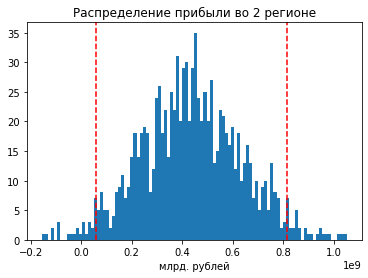

In [26]:
plt.hist(values,bins=100)
plt.axvline(x=lower, color='r', linestyle='--')
plt.axvline(x=upper, color='r', linestyle='--')
plt.title('Распределение прибыли во 2 регионе')
plt.xlabel('млрд. рублей')
plt.show()

### Bootstrap 3 регион

In [27]:
values = []
for i in range(bootstrap_samples):
    subsample=meow2.sample(n=500,replace=False,random_state=state)
    values.append(revenue(subsample))
avg_rev=round(sum(values)/len(values),2)
values=pd.Series(values)
loss_risk = (values < 0).sum()/len(values)*100
lower = values.quantile(0.025).round(2)
upper = values.quantile(0.975).round(2)
print("Средняя выручка:",avg_rev)
print("Доверительный интервал:",'[',lower,';',upper,']')
print("Риск убытков:",loss_risk,'%')

Средняя выручка: 367701191.4
Доверительный интервал: [ -158889038.08 ; 877355395.84 ]
Риск убытков: 8.4 %


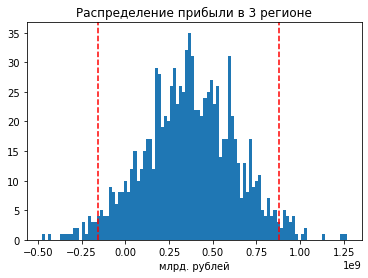

In [28]:
plt.hist(values,bins=100)
plt.axvline(x=lower, color='r', linestyle='--')
plt.axvline(x=upper, color='r', linestyle='--')
plt.title('Распределение прибыли в 3 регионе')
plt.xlabel('млрд. рублей')
plt.show()

### Анализ результатов

Из 3 регионов наибольшую выручку приносит 2 регион, однако, как можно было наблюдать на графике, такое возможно из-за того, что в регионе скважин с отсутствием и наоборот, с большим количеством нефти гораздо больше, чем со средним. Можно заметить, что нижняя граница 95% доверительного интервала очень низкая, из-за того, что шанс наткнуться на скважину без нефти очень большой. Риск убытков у этого региона также наибольший: в среднем около 1-2%, поэтому раскапывать новые скважины во 2 регионе не рекомендуется.

Сравнивая 1 и 3 регионы, можно заметить, что у 1 региона больше средняя выручка и границы доверительного интервала, это значит, что диапазон значений выручки будет "правее", чем у 3 региона. Шанс того, что прибыль будет отрицательной, также меньше.

### Новый анализ результатов

Судя по графикам, оптимальнее всего будет выбрать для раскопок 2 регион, поскольку он единственный, в котором 95% доверительный интервал целиком больше нуля- это значит, что с вероятностью 95% раскопки будут прибыльными и безубыточными. 